In [2]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2,threshold=50)  #更改打印设置

import imageio  #读取图片
img_arr = imageio.imread('/home/zhengyuheng/Code/PythonLearning/Pytorch/dlwpt-code-master/data/p1ch4/image-dog/bobby.jpg')
print(img_arr.shape)   #元图片为1280像素*720像素
img = torch.from_numpy(img_arr)
out = img.permute(2,0,1)   #换维度的顺序
print(out.shape)

batch_size = 3  #每次读进图片的个数
batch = torch.zeros(batch_size,3,256,256,dtype=torch.uint8)

import os    #定义路径变量
data_dir = '/home/zhengyuheng/Code/PythonLearning/Pytorch/dlwpt-code-master/data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
#读取路径下为PNG的文件
print(filenames)

for i,filename in enumerate(filenames):
    img_arr =imageio.imread(os.path.join(data_dir,filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2,0,1)
    img_t = img_t[:3]     #保险起见，有的图片有第4维度，只取前3维度
    batch[i] = img_t
batch = batch.float()
batch /= 255.0    #归一化
#标准化 x = ( x - mean )/ stdev
#减去平均值除以标准差
n_channels = batch.shape[1]   #读取通道数，即第1维度
for c in range(n_channels):
    mean = torch.mean(batch[:,c])
    std = torch.std(batch[:,c])
    batch[:,c] = (batch[:,c]-mean)/std


(720, 1280, 3)
torch.Size([3, 720, 1280])
['cat1.png', 'cat2.png', 'cat3.png']
tensor([[[[0.6118, 0.5961,  ..., 0.5843, 0.6196],
          [0.6824, 0.5255,  ..., 0.5333, 0.5412],
          ...,
          [0.5059, 0.5098,  ..., 0.4745, 0.4471],
          [0.5059, 0.4824,  ..., 0.4745, 0.4706]],

         [[0.5451, 0.5294,  ..., 0.5294, 0.5765],
          [0.6275, 0.4667,  ..., 0.4784, 0.4863],
          ...,
          [0.4353, 0.4353,  ..., 0.4392, 0.4118],
          [0.4353, 0.4078,  ..., 0.4314, 0.4353]],

         [[0.5059, 0.4824,  ..., 0.5176, 0.5686],
          [0.6078, 0.4314,  ..., 0.4667, 0.4745],
          ...,
          [0.4235, 0.4235,  ..., 0.4588, 0.4314],
          [0.4196, 0.3843,  ..., 0.4510, 0.4549]]],


        [[[0.7922, 0.7569,  ..., 0.0510, 0.0471],
          [0.7804, 0.7529,  ..., 0.0549, 0.0549],
          ...,
          [0.2941, 0.2667,  ..., 0.1412, 0.1451],
          [0.3333, 0.4039,  ..., 0.1451, 0.1490]],

         [[0.5922, 0.5451,  ..., 0.0353, 0.0314],
 

Reading DICOM (examining files): 1/99 files (1.0%)99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
(99, 512, 512)


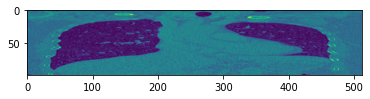

In [13]:
#%matplotlib inline
import numpy as np
import torch
import imageio
import matplotlib.pyplot as plt
torch.set_printoptions(edgeitems=2,threshold=50)  #更改打印设置

dir_path = "/home/zhengyuheng/Code/PythonLearning/Pytorch/dlwpt-code-master/data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path,'DICOM')
print(vol_arr.shape)
vol = torch.from_numpy(vol_arr).float()
vol = torch .unsqueeze(vol,0)   #在第0维度处加一维度
plt.imshow(vol_arr[50])    #查看第50张图片
plt.imshow(vol_arr[:,200,:])   #查看生成的纵切面

In [30]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2,precision=2,linewidth=75)  #更改打印设置
import pandas as pd
import csv

#df = pd.read_csv("/home/zhengyuheng/Code/PythonLearning/Pytorch/dlwpt-code-master/data/p1ch4/tabular-wine/winequality-white.csv")
#df.head()

wine_path = "/home/zhengyuheng/Code/PythonLearning/Pytorch/dlwpt-code-master/data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path,dtype=np.float32,delimiter=";",skiprows=1)
#delimiter为分割符   skiprows跳过几行
print(wine_numpy)
col_list = next(csv.reader(open(wine_path),delimiter=";"))
print(col_list)

wineq = torch.from_numpy(wineq_numpy)
data = wineq[:,:-1]   #取出所有特征
target = wineq[:,-1].long()    #取出标签
print(data,target)
target_unsqueezed = target.unsqueeze(1)  #将原来的大小n，改变为n*1
print(target_unsqueezed)

#将1维输出转换为onehot的10维型
target_onehot = torch.zeros(target.shape[0],10)
target_onehot.scatter_(1,target.unsqueeze(1),1.0)

#标准化
data_mean = torch.mean(data,dim=0)
data_var = torch.var(data,dim=0)   #方差
data_std = torch.std(data,dim=0)   #标准差
data_normalized = (data-data_mean)/data_std
print(data_normalized)

bad_data = data[target<=3]
mid_data = data[(target>3)&(target<7)]
good_data = data[target>=7]

[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
tensor([[ 7.00,  0.27,  ...,  0.45,  8.80],
        [ 6.30,  0.30,  ...,  0.49,  9.50],
        ...,
        [ 5.50,  0.29,  ...,  0.38, 12.80],
        [ 6.00,  0.21,  ...,  0.32, 11.80]]) tensor([6, 6,  ..., 7, 6])
tensor([[6],
        [6],
        ...,
        [7],
        [6]])
tensor([[ 1.72e-01, -8.18e-02,  ..., -3.49e-01, -1.39e+00],
        [-6.57e-01,  2.16e-01,  ...,  1.34e-03, -8.24e-01],
        ...,
        [-1.61e+00,  1.17e-01,  ..., -9.63e-01,  1.86e+00],
        [-1.01e+00, -6.77e-01,  ..., -1.49e+00,  1.04e+00]])


In [ ]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2,precision=2,linewidth=75)  #更改打印设置

bike_path = "/home/zhengyuheng/Code/PythonLearning/Pytorch/dlwpt-code-master/data/p1ch4/bike-sharing-dataset/hour-fixed.csv"
bikes_numpy = np.loadtxt(bike_path,dtype=np.float32,delimiter=",",skiprows=1,converters={1:lambda x:float(x[8:10])})